In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Subset
from collections import defaultdict
import random


def show_tensor_images_grid(tensor_data, printImg=False):
    """
    將 PyTorch tensor 中的圖片以灰階顯示，橫軸圖片數量從 [1, 2, 4, 8, 16] 中自動選擇最適合的數量。
    :param tensor_data: 要顯示的 PyTorch tensor, 預期形狀為 (batch, channels, height, width)
    :param printImg: 是否顯示圖片 (默認 True)
    """
    if not printImg:
        return

    # 確保 tensor 在 CPU，並轉換為 numpy
    tensor_data = tensor_data.detach().cpu().numpy()

    # 檢查資料的形狀 (batch, channels, height, width)
    batch_size, channels, height, width = tensor_data.shape

    # 橫軸候選值
    candidates = [1, 2, 4, 8, 16]
    # 選擇最適合的橫軸數量，使總行數最小
    images_per_row = min(candidates, key=lambda x: math.ceil(batch_size / x))

    # 計算行數
    num_rows = math.ceil(batch_size / images_per_row)

    # 建立圖表
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row, num_rows))
    axes = np.array(axes).reshape(num_rows, images_per_row)  # 確保 axes 是矩陣結構

    for i in range(num_rows * images_per_row):
        row, col = divmod(i, images_per_row)
        ax = axes[row, col]

        if i < batch_size:
            img = tensor_data[i]

            # 如果是 RGB 圖片（3 通道），轉換為灰階（使用第一個通道）
            if channels == 3:
                img = img[0]  # 使用第一個通道
            elif channels == 1:  # 單通道（灰階）
                img = img.squeeze(0)

            # 顯示圖片
            ax.imshow(img, cmap="gray")
        ax.axis("off")  # 隱藏座標軸

    plt.tight_layout()
    plt.show()


# 測試範例
if __name__ == "__main__":
    # 模擬一個隨機的 80x3x32x32 圖像資料並放到 GPU 上
    sample_data = torch.randn(32, 3, 32, 32).cuda()  # 放到 GPU
    show_tensor_images_grid(sample_data)


# Config

In [2]:
def set_config(args, custom_dataset="haha"):
    available_dataaset = ['Imagenet', 'CIFAR10', 'MNIST']
    if custom_dataset not in available_dataaset:
        ValueError(f'{custom_dataset} is not availabel, please select from {available_dataaset}')
    if custom_dataset == 'Imagenet':
        print(f"Config : {custom_dataset}")
        model_config = {
            "dataset" : args['dataset'],
            "state": args['state'],#"train", # or eval
            "epoch": args['epochs'],
            "batch_size": args['batch_size'],
            "T": 1000,
            "channel": 128,
            "channel_mult": [1, 2, 3, 4],
            "attn": [2],
            "num_res_blocks": 2,
            "dropout": 0.15,
            "lr": 1e-4,
            "multiplier": 2.,
            "beta_1": 1e-4,
            "beta_T": 0.02,
            "img_size": 128,
            "grad_clip": 1.,
            "device": "cuda:0", ### MAKE SURE YOU HAVE A GPU !!!
            "training_load_weight": f"{args['split_class']}_ckpt_{args['load_training_checkpoint']}_.pt",
            "save_weight_dir": "./Checkpoints" + args['dataset'] + "/",
            "test_load_weight": f"{str(args['split_class'])}_ckpt_{args['load_training_checkpoint']+args['epochs']-1}_.pt",
            "sampled_dir": "./SampledImgs" + args['dataset'] +"/",
            "sampledNoisyImgName": f"NoisyNoGuidenceImgs{args['load_training_checkpoint']+args['epochs']-1}.png",
            "sampledImgName": f"SampledNoGuidenceImgs{args['load_training_checkpoint']+args['epochs']-1}.png",
            "nrow": 8
        }
    if custom_dataset == 'CIFAR10':
        print(f"Config : {custom_dataset}")
        model_config = {
            "dataset" : args['dataset'],
            "state": args['state'],#"train", # or eval
            "epoch": args['epochs'],
            "batch_size": args['batch_size'],
            "T": 1000,
            "channel": 128,
            "channel_mult": [1, 2, 3, 4],
            "attn": [2],
            "num_res_blocks": 2,
            "dropout": 0.15,
            "lr": 1e-4,
            "multiplier": 2.,
            "beta_1": 1e-4,
            "beta_T": 0.02,
            "img_size": 128,
            "grad_clip": 1.,
            "device": "cuda:0", ### MAKE SURE YOU HAVE A GPU !!!
            "training_load_weight": f"{str(args['split_class'])}_ckpt_{args['load_training_checkpoint']}_.pt",
            "save_weight_dir": "./Checkpoints" + args['dataset'] + "/",
            "test_load_weight": f"{str(args['split_class'])}_ckpt_{args['load_training_checkpoint']+args['epochs']-1}_.pt",
            "sampled_dir": "./SampledImgs" + args['dataset'] +"/",
            "sampledNoisyImgName": f"NoisyNoGuidenceImgs{args['load_training_checkpoint']+args['epochs']-1}.png",
            "sampledImgName": f"SampledNoGuidenceImgs{args['load_training_checkpoint']+args['epochs']-1}.png",
            "nrow": 8
        }
    if custom_dataset == 'MNIST':
        print(f"Config : {custom_dataset}")
        model_config = {
            "dataset" : args['dataset'],
            "state": args['state'],#"train", # or eval
            "epoch": args['epochs'],
            "batch_size": args['batch_size'],
            "T": 1000,
            "channel": 128,
            "channel_mult": [1, 2, 3, 4],
            "attn": [2],
            "num_res_blocks": 2,
            "dropout": 0.15,
            "lr": 1e-4,
            "multiplier": 2.,
            "beta_1": 1e-4,
            "beta_T": 0.02,
            "img_size": 128,
            "grad_clip": 1.,
            "device": "cuda:0", ### MAKE SURE YOU HAVE A GPU !!!
            "training_load_weight": f"{str(args['split_class'])}_ckpt_{args['load_training_checkpoint']}_.pt",
            "save_weight_dir": "./Checkpoints" + args['dataset'] + "/",
#             "test_load_weight": f"{str(args['split_class'])}_ckpt_{args['load_training_checkpoint']+args['epochs']-1}_.pt",
            "test_load_weight": args["test_load_weight"],
            "sampled_dir": "./SampledImgs" + args['dataset'] +"/",
            "sampledNoisyImgName": f"NoisyNoGuidenceImgs{args['load_training_checkpoint']+args['epochs']-1}.png",
            "sampledImgName": f"SampledNoGuidenceImgs{args['load_training_checkpoint']+args['epochs']-1}.png",
            "nrow": 8
        }

    return model_config

# Dataset

In [3]:
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10, MNIST
from torch.utils.data import Dataset, DataLoader, Subset

def load_dataset():

    DatasetTransform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(48),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

    """
    if curr_dataset == 'CIFAR10':
        train_dataset = CIFAR10(root='./CIFAR10_ds', train=True, download=True, transform=DatasetTransform)
        test_dataset = CIFAR10(root='./CIFAR10_ds', train=False, download=True, transform=DatasetTransform)
        #train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
        #test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)
    """
    #elif curr_dataset == 'ImageNet':
    train_dataset = torchvision.datasets.ImageFolder(root='./imagenet-mini/train', transform=DatasetTransform)
    test_dataset = torchvision.datasets.ImageFolder(root='./imagenet-mini/val', transform=DatasetTransform)
    #train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
    #test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)
    """
    elif curr_dataset == 'CelebA':
        train_dataset = torchvision.datasets.ImageFolder(root='celeba/train', transform=DatasetTransform)
        test_dataset = torchvision.datasets.ImageFolder(root='celeba/val', transform=DatasetTransform)

    else:
        SyntaxError('Unrecongnize dataaset.')
    """

    return train_dataset, test_dataset



class CUSTOM_DATASET:
    def __init__(self, args):

        self.curr_dataset = args['dataset']
        self.split_class = args['split_class']
        self.split_flag = True if args['split_class'] else False

    def load_dataset(self):
        CIFAR10_DatasetTransform = transforms.Compose([
            transforms.Resize((32,32)),
            transforms.RandomCrop((26,26)),
            transforms.Resize((32,32)),
            transforms.RandomHorizontalFlip(p=0.5),
            #transforms.ColorJitter(brightness=0.2),
            #transforms.RandomGrayscale(p=0.2),
            transforms.ToTensor(),
            #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.5, 0.5, 0.5)),
            ])

        MNIST_DatasetTransform = transforms.Compose([
            transforms.Resize(32),
            torchvision.transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            ])

        Imagenet_DatasetTransform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(48),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

        if self.curr_dataset == 'MNIST':
            train_dataset = MNIST(root='./MNIST_ds', train=True, download=True, transform=MNIST_DatasetTransform)
            test_dataset = MNIST(root='./MNIST_ds', train=False, download=True, transform=MNIST_DatasetTransform)

            # 只要特定的數字類別
            ## train_dataset = [data for data in train_dataset if data[1] in [1, 6, 8]]
            ## test_dataset = [data for data in test_dataset if data[1] in [1, 6, 8]]

            #train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
            #test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)

        if self.curr_dataset == 'CIFAR10':
            train_dataset = CIFAR10(root='./CIFAR10_ds', train=True, download=True, transform=CIFAR10_DatasetTransform)
            test_dataset = CIFAR10(root='./CIFAR10_ds', train=False, download=True, transform=CIFAR10_DatasetTransform)
            #train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
            #test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)

        elif self.curr_dataset == 'Imagenet':
            train_dataset = torchvision.datasets.ImageFolder(root='tiny-imagenet/train', transform=Imagenet_DatasetTransform)
            test_dataset = torchvision.datasets.ImageFolder(root='tiny-imagenet/val', transform=Imagenet_DatasetTransform)
            #train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
            #test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)

        #elif self.curr_dataset == 'CelebA':
            #train_dataset = torchvision.datasets.ImageFolder(root='celeba/train', transform=DatasetTransform)
            #test_dataset = torchvision.datasets.ImageFolder(root='celeba/val', transform=DatasetTransform)

        else:
            SyntaxError('Unrecongnize dataaset.')

        # 過濾只留我們要的內容
        if self.split_flag:
            train_dataset, test_dataset = self.__split_dataset(train_dataset, test_dataset, self.split_class)


        return train_dataset, test_dataset
        
    def __split_dataset(self, train_dataset, test_dataset, split_class):
        # 設定目標樣本數
        class_target_counts = {
            0: 800,
            1: 400,
            2: 200
        }
    
        def select_indices(dataset, name=""):
            from collections import defaultdict
            import random
            label_to_indices = defaultdict(list)
    
            for i, (x, label) in enumerate(dataset):
                label_to_indices[label].append(i)
    
            print(f"[{name}] 原始各類別樣本數：")
            for cls in sorted(label_to_indices.keys()):
                print(f"  Class {cls}: {len(label_to_indices[cls])}")
    
            selected_idx = []
            for cls, indices in label_to_indices.items():
                if cls in class_target_counts:
                    desired = min(len(indices), class_target_counts[cls])
                else:
                    desired = min(len(indices), 100)  # 其他類別各 100
                sampled = random.sample(indices, desired)
                selected_idx.extend(sampled)
                print(f"[{name}] 選取 Class {cls}: {desired} / {len(indices)}")
    
            print(f"[{name}] 最終樣本總數：{len(selected_idx)}\n")
            return selected_idx
    
        train_idx = select_indices(train_dataset, name="Train")
        test_idx = select_indices(test_dataset, name="Test")
    
        new_train_dataset = Subset(train_dataset, train_idx)
        new_test_dataset = Subset(test_dataset, test_idx)
    
        return new_train_dataset, new_test_dataset


# Model

## AnalyzeRawData

In [4]:
class AnalyzeRawData:
    def __init__(self):
        self.eps = []
        self.img = []
        self.hsapce = []
        self.mean = []
        self.var = []
        self.config = ""
        print("init analyze Raw Data")
    def clean(self):
        self.eps = []
        self.img = []
        self.hsapce = []
        self.mean = []
        self.var = []
        self.config = ""
        print("clean analyze Raw Data")

# Create an instance of the class
analyzer = AnalyzeRawData()
analyzer.clean()

init analyze Raw Data
clean analyze Raw Data


## GaussianDiffusionTrainer

In [5]:
from torch.optim.lr_scheduler import _LRScheduler

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

import math
import torch
from torch import nn
from torch.nn import init
from torch.nn import functional as F




# Scheduler
class GradualWarmupScheduler(_LRScheduler):
    def __init__(self, optimizer, multiplier, warm_epoch, after_scheduler=None):
        self.multiplier = multiplier
        self.total_epoch = warm_epoch
        self.after_scheduler = after_scheduler
        self.finished = False
        self.last_epoch = None
        self.base_lrs = None
        super().__init__(optimizer)

    def get_lr(self):
        if self.last_epoch > self.total_epoch:
            if self.after_scheduler:
                if not self.finished:
                    self.after_scheduler.base_lrs = [base_lr * self.multiplier for base_lr in self.base_lrs]
                    self.finished = True
                return self.after_scheduler.get_lr()
            return [base_lr * self.multiplier for base_lr in self.base_lrs]
        return [base_lr * ((self.multiplier - 1.) * self.last_epoch / self.total_epoch + 1.) for base_lr in self.base_lrs]


    def step(self, epoch=None, metrics=None):
        if self.finished and self.after_scheduler:
            if epoch is None:
                self.after_scheduler.step(None)
            else:
                self.after_scheduler.step(epoch - self.total_epoch)
        else:
            return super(GradualWarmupScheduler, self).step(epoch)


# Diffusion
def extract(v, t, x_shape):
    """
    Extract some coefficients at specified timesteps, then reshape to
    [batch_size, 1, 1, 1, 1, ...] for broadcasting purposes.
    """
    device = t.device
    out = torch.gather(v, index=t, dim=0).float().to(device)
    return out.view([t.shape[0]] + [1] * (len(x_shape) - 1))



In [6]:

class GaussianDiffusionTrainer(nn.Module):
    def __init__(self, model, beta_1, beta_T, T):
        super().__init__()

        self.model = model
        self.T = T

        self.register_buffer(
            'betas', torch.linspace(beta_1, beta_T, T).double())
        alphas = 1. - self.betas
        alphas_bar = torch.cumprod(alphas, dim=0)

        # calculations for diffusion q(x_t | x_{t-1}) and others
        self.register_buffer(
            'sqrt_alphas_bar', torch.sqrt(alphas_bar))
        self.register_buffer(
            'sqrt_one_minus_alphas_bar', torch.sqrt(1. - alphas_bar))

    def forward(self, x_0):
        """
        Algorithm 1.
        """
        t = torch.randint(self.T, size=(x_0.shape[0], ), device=x_0.device)
        noise = torch.randn_like(x_0)
        x_t = (
            # 公式，算噪音加上圖片
            extract(self.sqrt_alphas_bar, t, x_0.shape) * x_0 +
            extract(self.sqrt_one_minus_alphas_bar, t, x_0.shape) * noise)
#         print("ready to show image")

        show_tensor_images_grid(x_t)
        model_result = self.model(x_t, t)
#         print("ready to show model result")
        show_tensor_images_grid(model_result)
        # 生成噪音家圖片，經過模型出來的預測噪聲和原本的噪音做比較
        # loss = F.mse_loss(self.model(x_t, t), noise, reduction='none')
        loss = F.mse_loss(model_result, noise, reduction='none')
        return loss


In [7]:

class GaussianDiffusionSampler(nn.Module):
    def __init__(self, model, beta_1, beta_T, T, fromT=1000, endT=0):
        super().__init__()

        self.model = model
        self.T = T
        self.fromT = fromT # 大的
        self.endT = endT# 小的
        self.register_buffer('betas', torch.linspace(beta_1, beta_T, T).double())
        alphas = 1. - self.betas
        alphas_bar = torch.cumprod(alphas, dim=0)
        alphas_bar_prev = F.pad(alphas_bar, [1, 0], value=1)[:T]

        self.register_buffer('coeff1', torch.sqrt(1. / alphas))
        self.register_buffer('coeff2', self.coeff1 * (1. - alphas) / torch.sqrt(1. - alphas_bar))

        self.register_buffer('posterior_var', self.betas * (1. - alphas_bar_prev) / (1. - alphas_bar))
        self.timestep_h_space = []


    def predict_xt_prev_mean_from_eps(self, x_t, t, eps):
        assert x_t.shape == eps.shape
        return (
            extract(self.coeff1, t, x_t.shape) * x_t -
            extract(self.coeff2, t, x_t.shape) * eps
        )

    def p_mean_variance(self, x_t, t):
        # below: only log_variance is used in the KL computations
        var = torch.cat([self.posterior_var[1:2], self.betas[1:]])
        var = extract(var, t, x_t.shape)
        
        eps = self.model(x_t, t)
        analyzer.eps.append(eps) # 儲存每一步驟的噪音
        xt_prev_mean = self.predict_xt_prev_mean_from_eps(x_t, t, eps=eps)

        return xt_prev_mean, var

    def load_h_imformation(self):
        return self.timestep_h_space

    def forward(self, x_T, h_space=None):
        """
        Algorithm 2.
        """
        x_t = x_T
        print("origin x_t")
        printImg = True
        show_tensor_images_grid(tensor_data = x_t, printImg=printImg)
        # 從 T= 1000 做到 0
        for time_step in tqdm(reversed(range(self.endT, self.fromT))):
            printImg = True
            if (time_step+1) % 100 == 0 or time_step < 50:
                printImg = True
            else:
                printImg = False
            # print("time step: ", time_step)
            # print("print img", printImg)
            #print(time_step)
            t = x_t.new_ones([x_T.shape[0], ], dtype=torch.long) * time_step
            # print("t one")
            # show_tensor_images_grid(tensor_data = x_t, printImg=printImg)
            # 取得加噪要使用的 mean 和 variance
            mean, var= self.p_mean_variance(x_t=x_t, t=t)
            analyzer.mean.append(mean)
            analyzer.var.append(var)
            # no noise when t == 0
            if time_step > 0:
                noise = torch.randn_like(x_t)
            else:
                noise = 0
            # 真正把噪音加入
            x_t = mean + torch.sqrt(var) * noise
            analyzer.img.append(x_t)
            # print("add noise x_t")
            show_tensor_images_grid(tensor_data = x_t, printImg=printImg)
            assert torch.isnan(x_t).int().sum() == 0, "nan in tensor."
            
            if (time_step+1) % 100 == 0:
                # 這邊要存個 噪音 eps 和去造的圖片
                self.timestep_h_space.append(torch.clip(x_t, -1, 1))
                
                print(f'Timestep {time_step} add to h space information.')
                print("h_space size", torch.clip(x_t, -1, 1).shape)

        x_0 = x_t



        return torch.clip(x_0, -1, 1)



In [8]:



# Model
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


class TimeEmbedding(nn.Module):
    def __init__(self, T, d_model, dim):
        assert d_model % 2 == 0
        super().__init__()
        emb = torch.arange(0, d_model, step=2) / d_model * math.log(10000)
        emb = torch.exp(-emb)
        pos = torch.arange(T).float()
        emb = pos[:, None] * emb[None, :]
        assert list(emb.shape) == [T, d_model // 2]
        emb = torch.stack([torch.sin(emb), torch.cos(emb)], dim=-1)
        assert list(emb.shape) == [T, d_model // 2, 2]
        emb = emb.view(T, d_model)

        self.timembedding = nn.Sequential(
            nn.Embedding.from_pretrained(emb),
            nn.Linear(d_model, dim),
            Swish(),
            nn.Linear(dim, dim),
        )
        self.initialize()

    def initialize(self):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                init.xavier_uniform_(module.weight)
                init.zeros_(module.bias)

    def forward(self, t):
        emb = self.timembedding(t)
        return emb


class DownSample(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.main = nn.Conv2d(in_ch, in_ch, 3, stride=2, padding=1)
        self.initialize()

    def initialize(self):
        init.xavier_uniform_(self.main.weight)
        init.zeros_(self.main.bias)

    def forward(self, x, temb):
        x = self.main(x)
        return x


class UpSample(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.main = nn.Conv2d(in_ch, in_ch, 3, stride=1, padding=1)
        self.initialize()

    def initialize(self):
        init.xavier_uniform_(self.main.weight)
        init.zeros_(self.main.bias)

    def forward(self, x, temb):
        _, _, H, W = x.shape
        # 把 x 放大兩倍
        x = F.interpolate(
            x, scale_factor=2, mode='nearest')
        x = self.main(x)
        return x


class AttnBlock(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.group_norm = nn.GroupNorm(32, in_ch)
        self.proj_q = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj_k = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj_v = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.initialize()

    def initialize(self):
        for module in [self.proj_q, self.proj_k, self.proj_v, self.proj]:
            init.xavier_uniform_(module.weight)
            init.zeros_(module.bias)
        init.xavier_uniform_(self.proj.weight, gain=1e-5)

    def forward(self, x):
        B, C, H, W = x.shape
        h = self.group_norm(x)
        q = self.proj_q(h)
        k = self.proj_k(h)
        v = self.proj_v(h)

        q = q.permute(0, 2, 3, 1).view(B, H * W, C)
        k = k.view(B, C, H * W)
        w = torch.bmm(q, k) * (int(C) ** (-0.5))
        assert list(w.shape) == [B, H * W, H * W]
        w = F.softmax(w, dim=-1)

        v = v.permute(0, 2, 3, 1).view(B, H * W, C)
        h = torch.bmm(w, v)
        assert list(h.shape) == [B, H * W, C]
        h = h.view(B, H, W, C).permute(0, 3, 1, 2)
        h = self.proj(h)

        return x + h


class ResBlock(nn.Module):
    def __init__(self, in_ch, out_ch, tdim, dropout, attn=False):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.GroupNorm(32, in_ch),
            #  x * torch.sigmoid(x)
            Swish(),
            nn.Conv2d(in_ch, out_ch, 3, stride=1, padding=1),
        )
        self.temb_proj = nn.Sequential(
            Swish(),
            nn.Linear(tdim, out_ch),
        )
        self.block2 = nn.Sequential(
            nn.GroupNorm(32, out_ch),
            Swish(),
            nn.Dropout(dropout),
            nn.Conv2d(out_ch, out_ch, 3, stride=1, padding=1),
        )
        if in_ch != out_ch:
            self.shortcut = nn.Conv2d(in_ch, out_ch, 1, stride=1, padding=0)
        else:
            self.shortcut = nn.Identity()
        if attn:
            self.attn = AttnBlock(out_ch)
        else:
            self.attn = nn.Identity()
        self.initialize()

    def initialize(self):
        for module in self.modules():
            if isinstance(module, (nn.Conv2d, nn.Linear)):
                init.xavier_uniform_(module.weight)
                init.zeros_(module.bias)
        init.xavier_uniform_(self.block2[-1].weight, gain=1e-5)

    def forward(self, x, temb):
        h = self.block1(x)
        h += self.temb_proj(temb)[:, :, None, None]
        h = self.block2(h)

        h = h + self.shortcut(x)
        h = self.attn(h)
        return h





In [9]:
evalData = {}
evalData['hspace'] = []
evalData['pixel'] = []
evalData['eps'] = []


In [10]:
class UNet(nn.Module):
    def __init__(self, T, ch, ch_mult, attn, num_res_blocks, dropout):
        super().__init__()
        assert all([i < len(ch_mult) for i in attn]), 'attn index out of bound'
        tdim = ch * 4
        self.time_embedding = TimeEmbedding(T, ch, tdim)

        self.head = nn.Conv2d(3, ch, kernel_size=3, stride=1, padding=1)
        self.downblocks = nn.ModuleList()
        chs = [ch]  # record output channel when dowmsample for upsample
        now_ch = ch
        for i, mult in enumerate(ch_mult):
            out_ch = ch * mult
            for _ in range(num_res_blocks):
                self.downblocks.append(ResBlock(
                    in_ch=now_ch, out_ch=out_ch, tdim=tdim,
                    dropout=dropout, attn=(i in attn)))
                now_ch = out_ch
                chs.append(now_ch)
            if i != len(ch_mult) - 1:
                self.downblocks.append(DownSample(now_ch))
                chs.append(now_ch)

        self.middleblocks = nn.ModuleList([
            ResBlock(now_ch, now_ch, tdim, dropout, attn=True),
            ResBlock(now_ch, now_ch, tdim, dropout, attn=False),
        ])

        self.upblocks = nn.ModuleList()
        for i, mult in reversed(list(enumerate(ch_mult))):
            out_ch = ch * mult
            for _ in range(num_res_blocks + 1):
                self.upblocks.append(ResBlock(
                    in_ch=chs.pop() + now_ch, out_ch=out_ch, tdim=tdim,
                    dropout=dropout, attn=(i in attn)))
                now_ch = out_ch
            if i != 0:
                self.upblocks.append(UpSample(now_ch))
        assert len(chs) == 0

        self.tail = nn.Sequential(
            nn.GroupNorm(32, now_ch),
            Swish(),
            nn.Conv2d(now_ch, 3, 3, stride=1, padding=1)
        )
        self.initialize()

    def initialize(self):
        init.xavier_uniform_(self.head.weight)
        init.zeros_(self.head.bias)
        init.xavier_uniform_(self.tail[-1].weight, gain=1e-5)
        init.zeros_(self.tail[-1].bias)

    def printlog(self):

        # print("in UNet hspace ")
        pass
    def forward(self, x, t):
        # Timestep embedding
        temb = self.time_embedding(t)
        # Downsampling
        h = self.head(x)
        hs = [h]
        for layer in self.downblocks:
            h = layer(h, temb)
            hs.append(h)
        # Middle
        isMiddle = 1;
        for layer in self.middleblocks:
            self.printlog()
            h = layer(h, temb)
            
            if isMiddle == 1:
                analyzer.hsapce.append(h)
                # 儲存 h
                
            isMiddle = 0
        # Upsampling
        for layer in self.upblocks:
            if isinstance(layer, ResBlock):
                h = torch.cat([h, hs.pop()], dim=1)
            h = layer(h, temb)
        h = self.tail(h)

        assert len(hs) == 0
        return h

    # 沒用到
    def get_h_space(self, x, t):
        # Timestep embedding
        temb = self.time_embedding(t)
        # Downsample

        h = self.head(x)
        for layer in self.downblocks:
            h = layer(h, temb)

        # Middle
        for layer in self.middleblocks:
            h = layer(h, temb)

        return h
    # 沒用到
    def sample_from_h_space(self, x, t, new_h):
        # Timestep embedding
        temb = self.time_embedding(t)

        # Downsampling
        h = self.head(x)
        hs = [h]
        for layer in self.downblocks:
            h = layer(h, temb)
            hs.append(h)

        # Middle
        h = new_h

        # Upsampling
        for layer in self.upblocks:
            if isinstance(layer, ResBlock):
                h = torch.cat([h, hs.pop()], dim=1)
            h = layer(h, temb)
        h = self.tail(h)

        assert len(hs) == 0
        return h

if __name__ == '__main__':
    batch_size = 8
    model = UNet(
        T=1000, ch=128, ch_mult=[1, 2, 2, 2], attn=[1],
        num_res_blocks=2, dropout=0.1)
    x = torch.randn(batch_size, 3, 32, 32)
    t = torch.randint(1000, (batch_size, ))
    y = model(x, t)
    print(y.shape)

torch.Size([8, 3, 32, 32])


# Train

In [11]:

import os
from typing import Dict

import torch
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torchvision.utils import save_image

# from Model import GaussianDiffusionSampler, GaussianDiffusionTrainer, GradualWarmupScheduler, UNet
# from Custom_dataset import CUSTOM_DATASET

def train(args, modelConfig: Dict):
    device = torch.device(modelConfig["device"])
    # dataset
    """
    dataset = CIFAR10(
        root='./CIFAR10', train=True, download=True,
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]))
    """
    print("in training")
    dt = CUSTOM_DATASET(args)
    print("got dataset")
    train_dataset, test_dataset = dt.load_dataset()
    dataloader = DataLoader(
        train_dataset, batch_size=modelConfig["batch_size"], shuffle=True, num_workers=4, drop_last=True, pin_memory=True)
    print("got dataloader")
    # model setup
    net_model = UNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
                     num_res_blocks=modelConfig["num_res_blocks"], dropout=modelConfig["dropout"]).to(device)
    print("got model")
    load_e = 0
    if args['load_training_checkpoint'] > 0:
        load_e += int(modelConfig["training_load_weight"].split('_')[-2]) #load number of epochs
        net_model.load_state_dict(torch.load(os.path.join(
            modelConfig["save_weight_dir"], modelConfig["training_load_weight"]), map_location=device))
    optimizer = torch.optim.AdamW(
        net_model.parameters(), lr=modelConfig["lr"], weight_decay=1e-4)
    cosineScheduler = optim.lr_scheduler.CosineAnnealingLR(
        optimizer=optimizer, T_max=modelConfig["epoch"], eta_min=0, last_epoch=-1)
    warmUpScheduler = GradualWarmupScheduler(
        optimizer=optimizer, multiplier=modelConfig["multiplier"], warm_epoch=modelConfig["epoch"] // 10, after_scheduler=cosineScheduler)
    trainer = GaussianDiffusionTrainer(
        net_model, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"]).to(device)
    print("start training")
    # start training
    for e in range(1, modelConfig["epoch"]+1):
        with tqdm(dataloader, dynamic_ncols=True) as tqdmDataLoader:
            for images, labels in tqdmDataLoader:
                # train
                optimizer.zero_grad()
                x_0 = images.to(device)
                loss = trainer(x_0).sum() / 1000.
                loss.backward()
                torch.nn.utils.clip_grad_norm_(
                    net_model.parameters(), modelConfig["grad_clip"])
                optimizer.step()
                tqdmDataLoader.set_postfix(ordered_dict={
                    "epoch": e + load_e,
                    "loss: ": loss.item(),
                    "img shape: ": x_0.shape,
                    "LR": optimizer.state_dict()['param_groups'][0]["lr"]
                })
        warmUpScheduler.step()

        if modelConfig["save_weight_dir"][2:-1] not in os.listdir(os.getcwd()): # Only characters
            os.mkdir(modelConfig["save_weight_dir"])
            print("have mkdir")

        if e > modelConfig["epoch"] - 5 or e % 20  == 0 or e%50 == 0:
            torch.save(net_model.state_dict(), os.path.join(
                modelConfig["save_weight_dir"], f'{str(args["split_class"])}_ckpt_' + str(e+load_e) + "_.pt"))
            print("have save")

def eval(args, modelConfig: Dict):
    # load model and evaluate
    with torch.no_grad():
        # set device
        device = torch.device(modelConfig["device"])
        # set the model form
        model = UNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
                     num_res_blocks=modelConfig["num_res_blocks"], dropout=0.)
        # load previos weight 從指定的檔案
        print(os.path.join(
            modelConfig["save_weight_dir"], modelConfig["test_load_weight"]))
        ckpt = torch.load(os.path.join(
            modelConfig["save_weight_dir"], modelConfig["test_load_weight"]), map_location=device)
        model.load_state_dict(ckpt)
        print("model load weight done.")

        # set the entire model to eval type
        model.eval()

        # 初始化高斯擴散采样器 `GaussianDiffusionSampler`，這是用於從高斯噪聲中生成圖像的擴散模型
        # 這裡傳入模型、beta 參數範圍，以及時間步長 `T`
        # 整個去造的過程在裡面進行
        sampler = GaussianDiffusionSampler(
            model, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"]).to(device)
        # Sampled from standard normal distribution
        noisyImage = torch.randn(
            size=[modelConfig["batch_size"], 3, 32, 32], device=device)
        saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)

        # 做一個資料夾來存放生成的圖像
        if modelConfig["sampled_dir"][2:-1] not in os.listdir(os.getcwd()): # Only characters
            os.mkdir(modelConfig["sampled_dir"])

        save_image(saveNoisy, os.path.join(
            modelConfig["sampled_dir"], modelConfig["sampledNoisyImgName"]), nrow=modelConfig["nrow"])
        sampledImgs = sampler(noisyImage)
        sampledImgs = sampledImgs * 0.5 + 0.5  # [0 ~ 1]
        save_image(sampledImgs, os.path.join(
            modelConfig["sampled_dir"],  modelConfig["sampledImgName"]), nrow=modelConfig["nrow"])

In [12]:

def eval_between(args, modelConfig: Dict, middleT = 500, order = '50ckpt'):
    # load model and evaluate
    with torch.no_grad():
        fromT = 1000
        endT = 0
        first_path = '/kaggle/input/0to9-ckpt-50-shortddpm/pytorch/default/1/0 1 2 3 4 5 6 7 8 9_ckpt_50_.pt'
        second_path = '/kaggle/input/0to9-ckpt10-shortddpm/pytorch/default/1/0 1 2 3 4 5 6 7 8 9_ckpt_10_ (2).pt'
        if order == '10ckpt':
            first_path, second_path = second_path, first_path
        
        
        # set device
        device = torch.device(modelConfig["device"])

        ## first half
        
        # set the model form
        model_first = UNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
                     num_res_blocks=modelConfig["num_res_blocks"], dropout=0.)
        # load previos weight 從指定的檔案
        print(first_path)
        ckpt_first = torch.load(first_path, map_location=device)
        model_first.load_state_dict(ckpt_first)
        print("first model load weight done.")

        # set the entire model to eval type
        model_first.eval()

        # 初始化高斯擴散采样器 `GaussianDiffusionSampler`，這是用於從高斯噪聲中生成圖像的擴散模型
        # 這裡傳入模型、beta 參數範圍，以及時間步長 `T`
        # 整個去造的過程在裡面進行
        sampler_first = GaussianDiffusionSampler(
            model_first, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"], fromT, middleT).to(device)
        # Sampled from standard normal distribution
        noisyImage = torch.randn(
            size=[modelConfig["batch_size"], 3, 32, 32], device=device)
        saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)

        # 做一個資料夾來存放生成的圖像
        if modelConfig["sampled_dir"][2:-1] not in os.listdir(os.getcwd()): # Only characters
            os.mkdir(modelConfig["sampled_dir"])

        # save_image(saveNoisy, os.path.join(
        #     modelConfig["sampled_dir"], modelConfig["sampledNoisyImgName"]), nrow=modelConfig["nrow"])
        sampledImgs_middle = sampler_first(noisyImage)
        sampledImgs_middle_b = sampledImgs_middle * 0.5 + 0.5  # [0 ~ 1]
        # save_image(sampledImgs, os.path.join(
        #     modelConfig["sampled_dir"],  modelConfig["sampledImgName"]), nrow=modelConfig["nrow"])

        print("----- first model done -----")
        ## second half

        # set the model form
        model_second = UNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
                     num_res_blocks=modelConfig["num_res_blocks"], dropout=0.)
        # load previos weight 從指定的檔案
        print(second_path)
        ckpt_second = torch.load(second_path, map_location=device)
        model_second.load_state_dict(ckpt_second)
        print("second model load weight done.")

        # set the entire model to eval type
        model_second.eval()

        # 初始化高斯擴散采样器 `GaussianDiffusionSampler`，這是用於從高斯噪聲中生成圖像的擴散模型
        # 這裡傳入模型、beta 參數範圍，以及時間步長 `T`
        # 整個去造的過程在裡面進行
        sampler_second = GaussianDiffusionSampler(
            model_second, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"], middleT, endT).to(device)
        # Sampled from standard normal distribution
        noisyImage = sampledImgs_middle
        saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)

        # 做一個資料夾來存放生成的圖像
        if modelConfig["sampled_dir"][2:-1] not in os.listdir(os.getcwd()): # Only characters
            os.mkdir(modelConfig["sampled_dir"])

        # save_image(saveNoisy, os.path.join(
        #     modelConfig["sampled_dir"], modelConfig["sampledNoisyImgName"]), nrow=modelConfig["nrow"])
        sampledImgs = sampler_second(noisyImage)
        sampledImgs = sampledImgs_middle * 0.5 + 0.5  # [0 ~ 1]
        # save_image(sampledImgs, os.path.join(
        #     modelConfig["sampled_dir"],  modelConfig["sampledImgName"]), nrow=modelConfig["nrow"])
        print("===== second model done =====\n\n")

# Seed

In [13]:
import random
import os
import numpy as np
import torch

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


# Main

MNIST
Config : MNIST
Successfully got argument
./CheckpointsMNIST/200epoch.pt


C:\Users\9373k\AppData\Local\Temp\ipykernel_21212\3667438218.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(


model load weight done.
origin x_t


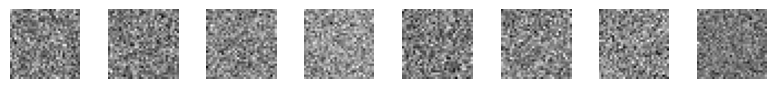

0it [00:00, ?it/s]

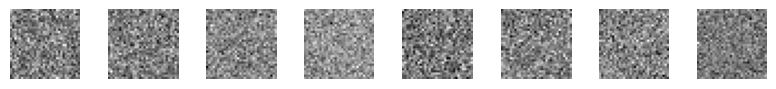

1it [00:01,  1.47s/it]

Timestep 999 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


100it [00:07, 17.11it/s]

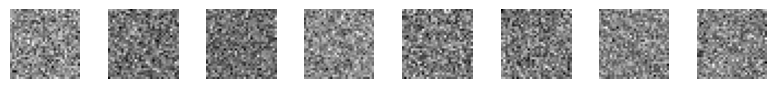

104it [00:07, 13.13it/s]

Timestep 899 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


200it [00:13, 17.57it/s]

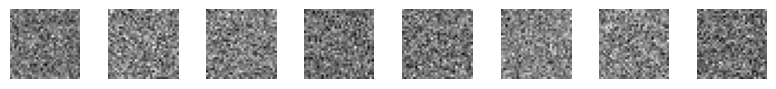

204it [00:14, 14.20it/s]

Timestep 799 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


300it [00:19, 18.06it/s]

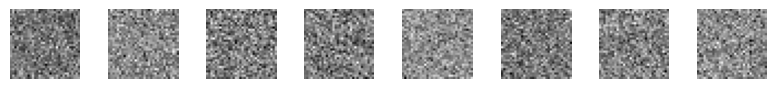

304it [00:19, 11.66it/s]

Timestep 699 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


400it [00:25, 17.98it/s]

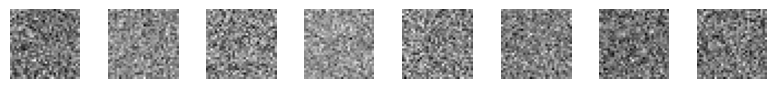

404it [00:25, 14.96it/s]

Timestep 599 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


500it [00:30, 18.08it/s]

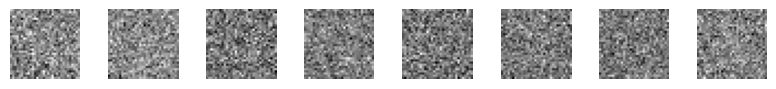

504it [00:31, 13.50it/s]

Timestep 499 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


600it [00:36, 18.16it/s]

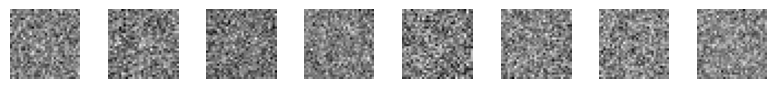

604it [00:37, 14.52it/s]

Timestep 399 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


700it [00:42, 14.55it/s]

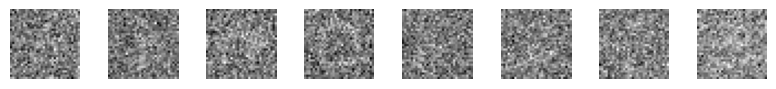

702it [00:43,  9.98it/s]

Timestep 299 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


800it [00:49, 17.50it/s]

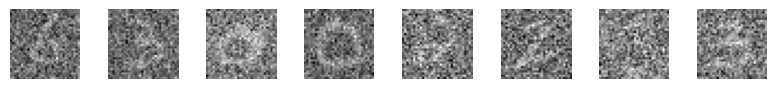

804it [00:49, 14.03it/s]

Timestep 199 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


900it [00:54, 17.85it/s]

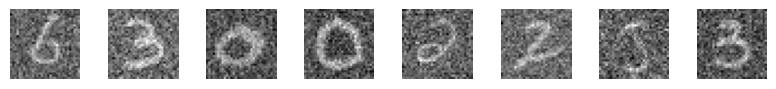

904it [00:55, 14.39it/s]

Timestep 99 add to h space information.
h_space size torch.Size([8, 3, 32, 32])


950it [00:57, 16.57it/s]

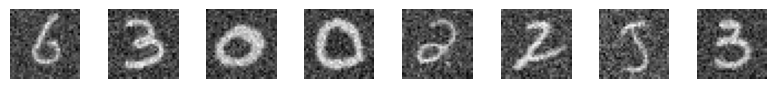

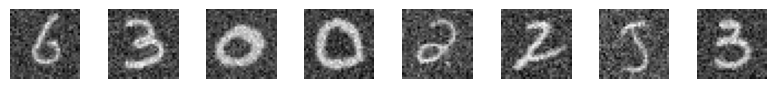

952it [00:58,  6.58it/s]

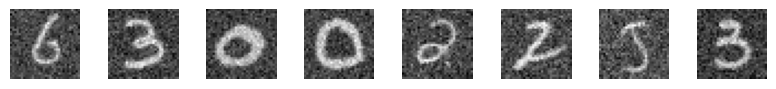

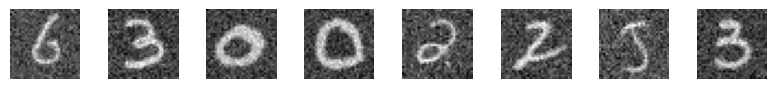

954it [00:59,  5.25it/s]

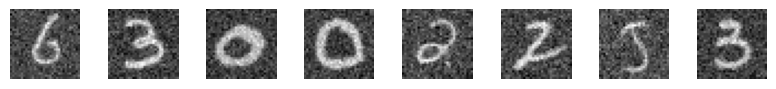

955it [00:59,  5.08it/s]

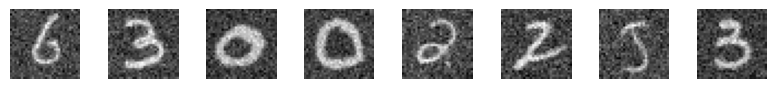

956it [00:59,  4.70it/s]

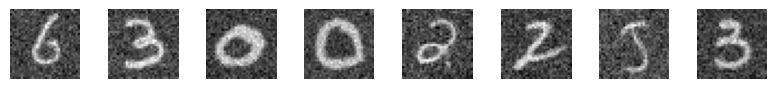

957it [00:59,  4.64it/s]

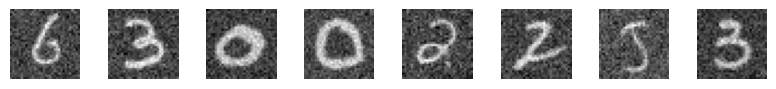

958it [01:00,  4.07it/s]

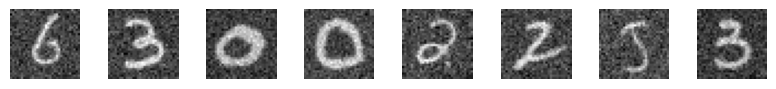

959it [01:00,  3.24it/s]

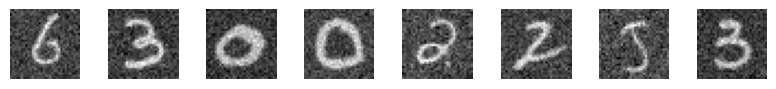

960it [01:00,  3.51it/s]

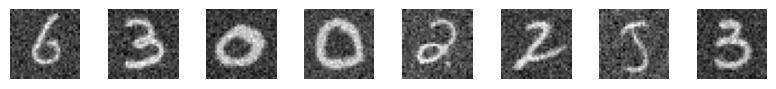

961it [01:01,  3.77it/s]

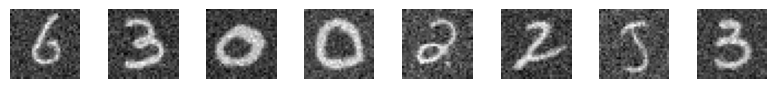

962it [01:01,  3.91it/s]

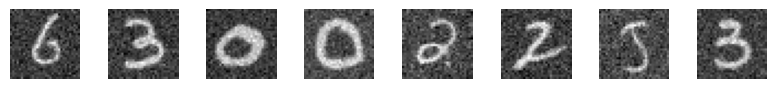

963it [01:01,  3.72it/s]

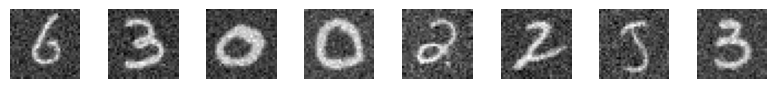

964it [01:01,  3.96it/s]

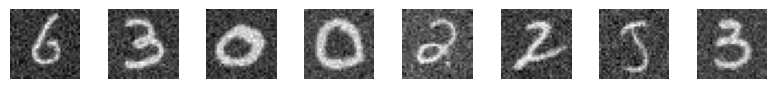

965it [01:02,  4.31it/s]

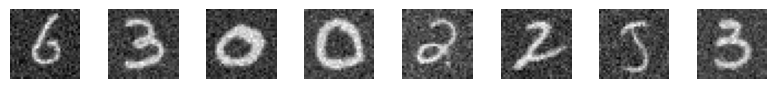

966it [01:02,  3.71it/s]

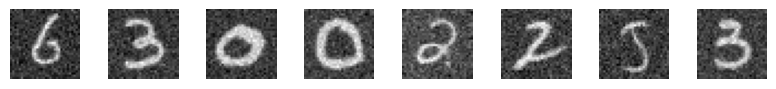

967it [01:02,  4.05it/s]

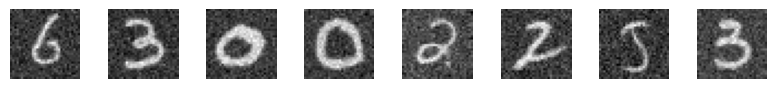

968it [01:02,  4.37it/s]

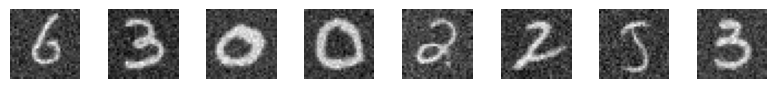

969it [01:02,  4.44it/s]

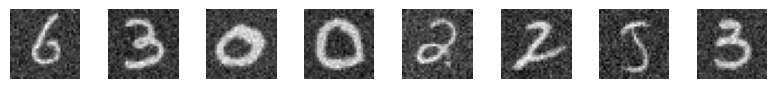

970it [01:03,  4.67it/s]

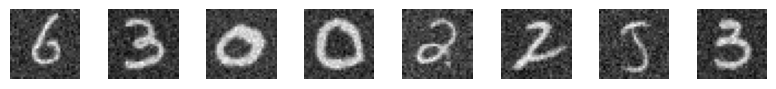

971it [01:03,  4.84it/s]

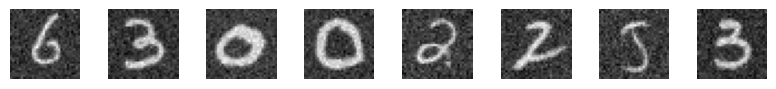

972it [01:03,  4.88it/s]

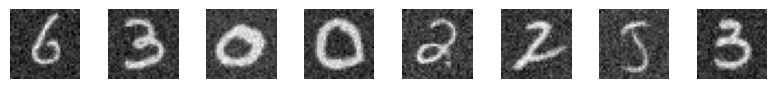

973it [01:03,  4.62it/s]

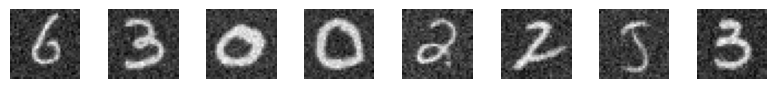

974it [01:04,  3.47it/s]

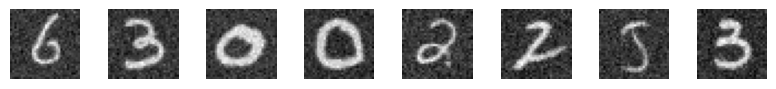

975it [01:04,  3.69it/s]

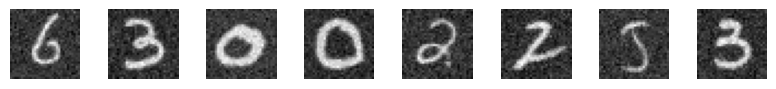

976it [01:04,  3.90it/s]

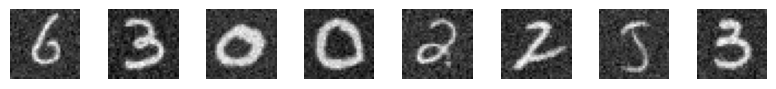

977it [01:04,  4.03it/s]

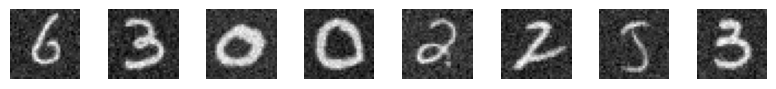

978it [01:05,  3.99it/s]

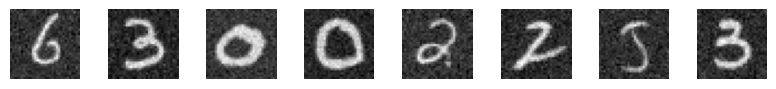

979it [01:05,  4.11it/s]

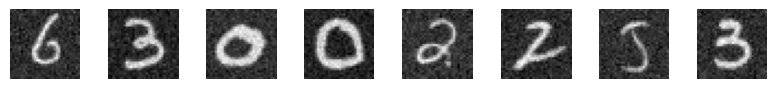

980it [01:05,  4.36it/s]

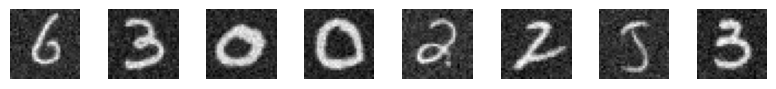

981it [01:05,  4.51it/s]

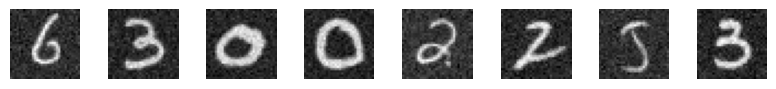

982it [01:06,  3.56it/s]

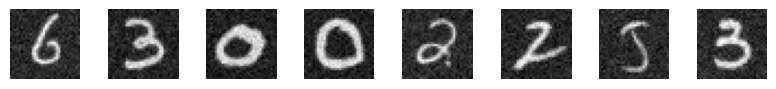

983it [01:06,  3.64it/s]

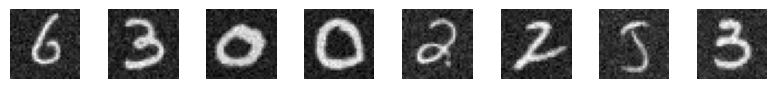

984it [01:06,  3.82it/s]

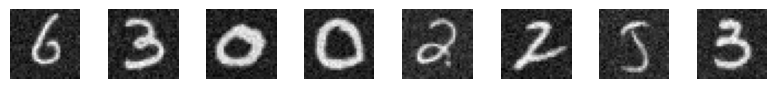

985it [01:06,  3.93it/s]

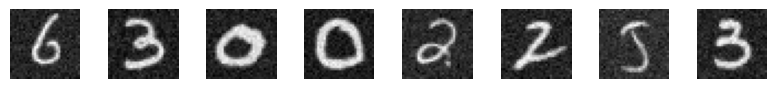

986it [01:07,  3.90it/s]

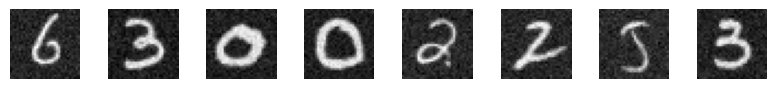

987it [01:07,  4.21it/s]

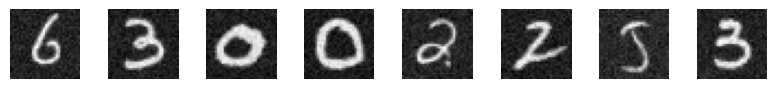

988it [01:07,  4.45it/s]

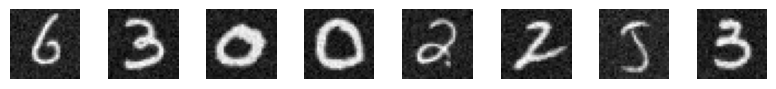

989it [01:08,  3.57it/s]

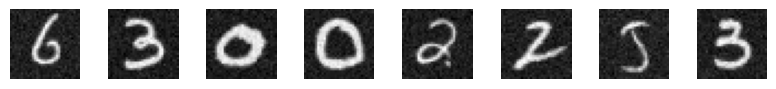

990it [01:08,  3.79it/s]

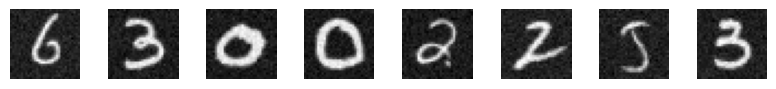

991it [01:08,  4.10it/s]

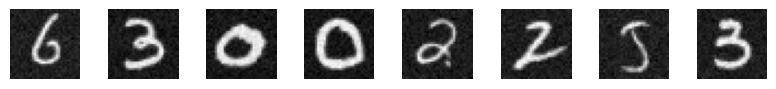

992it [01:08,  3.92it/s]

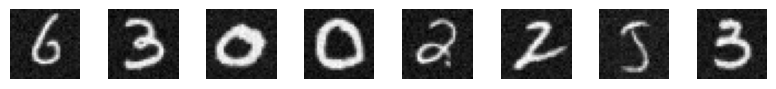

993it [01:09,  3.72it/s]

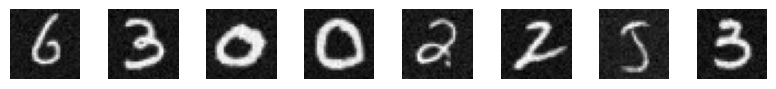

994it [01:09,  3.69it/s]

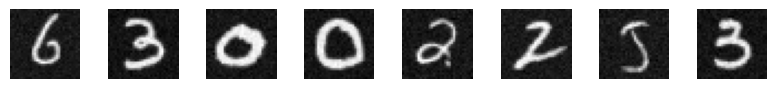

995it [01:09,  3.57it/s]

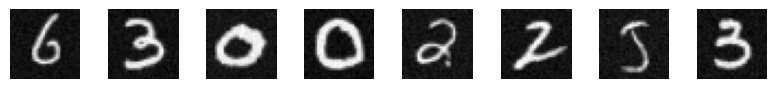

996it [01:09,  3.62it/s]

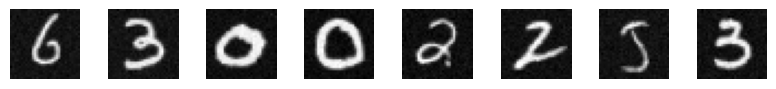

997it [01:10,  3.18it/s]

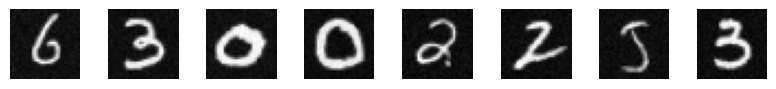

998it [01:10,  3.44it/s]

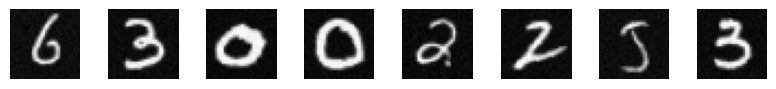

999it [01:10,  3.84it/s]

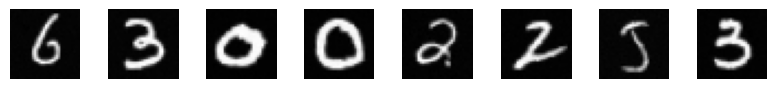

1000it [01:10, 14.09it/s]


In [14]:
# Import necessary modules
# from Train import train, eval
# from Config import set_config
import logging
# from Utils import seed_everything
import torch

# Define the main training function
def main_train(model_config=None):
    modelConfig = {
        "state": "train",  # or eval
        "epoch": 50,
        "batch_size": 4,
        "T": 1000,
        "channel": 128,
        "channel_mult": [1, 2, 3, 4],
        "attn": [2],
        "num_res_blocks": 2,
        "dropout": 0.15,
        "lr": 1e-4,
        "multiplier": 2.0,
        "beta_1": 1e-4,
        "beta_T": 0.02,
        "img_size": 128,
        "grad_clip": 1.0,
        "device": "cuda" if torch.cuda.is_available() else "cpu",  # Auto-detect GPU availability
        "training_load_weight": "ckpt_19_.pt",
        "save_weight_dir": "/content/Checkpoints/",  # Adjusted for Colab
        "test_load_weight": "50epoch.pt",
        "sampled_dir": "/content/SampledImgs/",  # Adjusted for Colab
        "sampledNoisyImgName": "NoisyNoGuidenceImgs.png",
        "sampledImgName": "SampledNoGuidenceImgs.png",
        "nrow": 8
    }

    if model_config is not None:
        modelConfig = model_config

    if modelConfig["state"] == "train":
        train(modelConfig)
    else:
        eval(modelConfig)

# Define the main evaluation function
def main_eval(model_config=None):
    modelConfig = {
        "state": "eval",  # or eval
        "epoch": 10,
        "batch_size": 8,
        "T": 1000,
        "channel": 128,
        "channel_mult": [1, 2, 3, 4],
        "attn": [2],
        "num_res_blocks": 2,
        "dropout": 0.15,
        "lr": 1e-4,
        "multiplier": 2.0,
        "beta_1": 1e-4,
        "beta_T": 0.02,
        "img_size": 32,
        "grad_clip": 1.0,
        "device": "cuda" if torch.cuda.is_available() else "cpu",  # Auto-detect GPU availability
        "training_load_weight": None,
        "save_weight_dir": "/content/Checkpoints/",  # Adjusted for Colab
        # "test_load_weight": "ckpt_67_.pt",
        "test_load_weight": "200epoch.pt",
        "sampled_dir": "/content/SampledImgs/",  # Adjusted for Colab
        "sampledNoisyImgName": "NoisyNoGuidenceImgs3314.png",
        "sampledImgName": "SampledNoGuidenceImgs3314.png",
        "nrow": 8
    }

    if model_config is not None:
        modelConfig = model_config

    if modelConfig["state"] == "train":
        train(modelConfig)
    else:
        eval(modelConfig)

# Set up the configuration and model arguments manually for Colab
args = {
    'seed': 42,
    'state': 'train',  # Change to 'eval' for evaluation
    # 'state': 'eval',
    # 'dataset': 'CIFAR10',  # Select dataset from [Imagenet, CIFAR10, MNIST]
    'dataset': 'MNIST',
    'epochs': 200,
    # 'epochs': 50,
    # 'batch_size': 80,
    'batch_size': 8, # 一次幾張圖片
    'split_class': [0,1,2,3,4,5,6,7,8,9],  # Trained specific class of data 指定數字用這裡，可以塞很多數字
    'load_training_checkpoint': 0,  # Load the number of trained epochs
    "test_load_weight": "200epoch.pt",
}

# Set random seed
# seed_everything(args['seed'])
seed_everything(args['seed']+55)
print(args['dataset'])


# Get the model configuration
model_config = set_config(args, custom_dataset=args['dataset'])

# Log message to confirm configuration
print("Successfully got argument")
analyzer.clean
analyzer.config = model_config
# train(args, model_config)
eval(args, model_config)

In [15]:
len(analyzer.hsapce)

1001

In [16]:
print("ghe")

ghe


# Concat Model

In [17]:
# print('\n\n === 950 10->50 ===')
# eval_between(args, model_config, 950, '10ckpt')
# print('\n\n === 950 50->10 ===')
# eval_between(args, model_config, 950, '50ckpt')
# print('\n\n === 500 10->50 ===')
# eval_between(args, model_config, 500, '10ckpt')
# print('\n\n === 500 50->10 ===')
# eval_between(args, model_config, 500, '50ckpt')
# print('\n\n === 50 10->50 ===')
# eval_between(args, model_config, 50, '10ckpt')
# print('\n\n === 50 50->10 ===')
# eval_between(args, model_config, 50, '50ckpt')

# PCA Model

In [18]:
# show_tensor_images_grid(analyzer.eps[999], True)
# print(analyzer.mean[100])

In [19]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw3d(data, labels, title="testing"):
        
    # Step 1: Flatten the data for PCA (160, feature_size)
    data_flat = data.view(data.size(0), -1).cpu().detach().numpy()  # Move to CPU and flatten
    
    # Step 2: Apply PCA to reduce to 3 dimensions
    pca = PCA(n_components=3)
    data_pca = pca.fit_transform(data_flat)
    
    # Step 3: Map labels to unique colors
    unique_labels = np.unique(labels)
    label_to_color = {label: plt.cm.jet(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
    colors = np.array([label_to_color[label] for label in labels])
    
    # Step 4: Plot the reduced data in 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot with colors based on labels
    scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=colors, s=50)
    
    # Adding labels
    ax.set_title(title)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    
    # Show the plot
    plt.show()

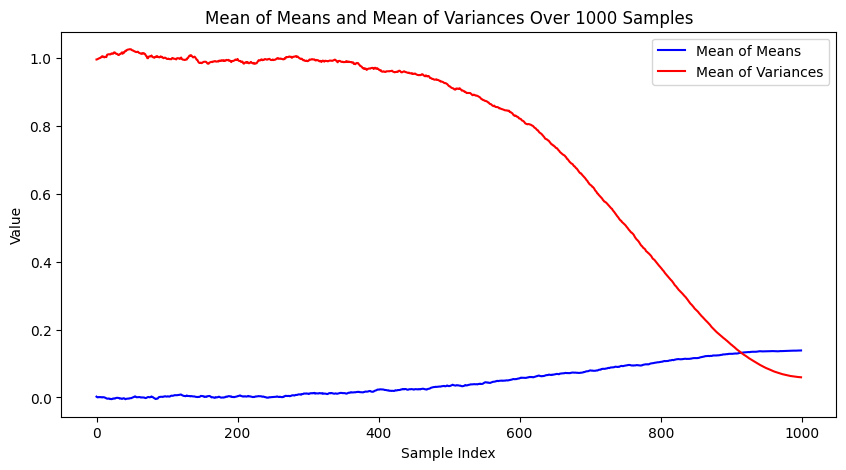

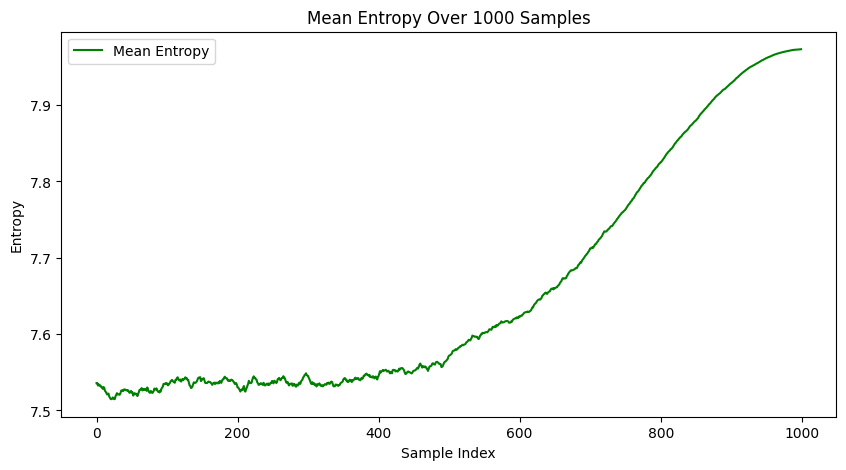

In [20]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

meanList = []
varList = []
entropyList = []

for i in range(0, 1000):
    # Assuming your tensor is of shape (160, 3, 32, 32)
    data = analyzer.img[i]  # Example data
    
    # Calculate mean and variance over the batch (axis 0)
    mean = data.mean(dim=0)  # Mean across the 160 data points
    var = data.var(dim=0)    # Variance across the 160 data points
    
    # Now, you want the mean of the mean and variance of each (3, 32, 32) image
    mean_of_mean = mean.mean()  # Mean of means
    mean_of_var = var.mean()    # Mean of variances
    
    # Calculate the entropy
    # Flatten the image tensor and normalize it to the [0, 1] range
    flattened_data = data.flatten(start_dim=1)  # Flatten the image to a 2D tensor (160, 3*32*32)
    prob_dist = F.softmax(flattened_data, dim=1)  # Softmax to get a probability distribution
    
    # Compute entropy for each sample in the batch
    entropy = -torch.sum(prob_dist * torch.log(prob_dist + 1e-8), dim=1)  # Add a small epsilon to avoid log(0)
    
    # Calculate the mean entropy of the batch
    mean_entropy = entropy.mean().item()

    # Append the statistics to the lists
    meanList.append(mean_of_mean.item())
    varList.append(mean_of_var.item())
    entropyList.append(mean_entropy)

# Plotting the first figure: Mean of Means and Mean of Variances
plt.figure(figsize=(10, 5))

# Plot mean of means
plt.plot(meanList, label='Mean of Means', color='b')

# Plot mean of variances
plt.plot(varList, label='Mean of Variances', color='r')

# Adding titles and labels
plt.title('Mean of Means and Mean of Variances Over 1000 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Show the first plot
plt.show()

# Plotting the second figure: Mean Entropy
plt.figure(figsize=(10, 5))

# Plot entropy
plt.plot(entropyList, label='Mean Entropy', color='g')

# Adding titles and labels
plt.title('Mean Entropy Over 1000 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Entropy')
plt.legend()

# Show the second plot
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.223154..3.370881].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.019164603..1.0026762].


Entropy of noise image: 7.541602611541748
Entropy of normal photo: 7.994380950927734


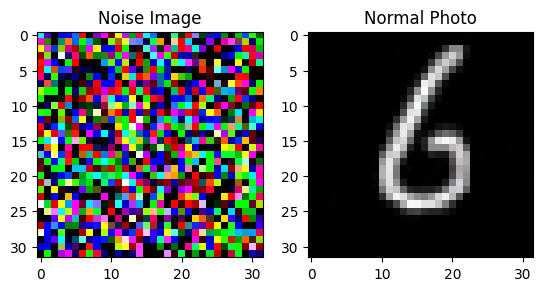

In [21]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Create a random noise image (e.g., Gaussian noise)
noise_image = torch.randn(3, 32, 32)  # Example noise image with shape (3, 32, 32)

# Load a normal photo (or use a preloaded image)
# Assume we have `normal_image` as a 3x32x32 tensor (you can load an image using PIL and convert to tensor)

# Example normal photo (replace with actual image loading code)
normal_image = analyzer.img[-1][0]  # Example normal photo

def calculate_entropy(image):
    # Flatten the image and apply softmax to get probability distribution
    flattened_image = image.flatten(start_dim=0)
    prob_dist = F.softmax(flattened_image, dim=0)
    
    # Compute entropy for the image
    entropy = -torch.sum(prob_dist * torch.log(prob_dist + 1e-8))  # Small epsilon to avoid log(0)
    
    return entropy.item()

# Calculate the entropy for both images
entropy_noise = calculate_entropy(noise_image)
entropy_normal = calculate_entropy(normal_image)

print(f"Entropy of noise image: {entropy_noise}")
print(f"Entropy of normal photo: {entropy_normal}")

# Optionally plot the images to visualize them
plt.subplot(1, 2, 1)
plt.imshow(noise_image.permute(1, 2, 0).numpy())  # Permute to (32, 32, 3) for visualization
plt.title("Noise Image")

plt.subplot(1, 2, 2)
plt.imshow(normal_image.permute(1, 2, 0).cpu().numpy())  # Permute to (32, 32, 3) for visualization
plt.title("Normal Photo")

plt.show()


ValueError: 'c' argument has 160 elements, which is inconsistent with 'x' and 'y' with size 8.

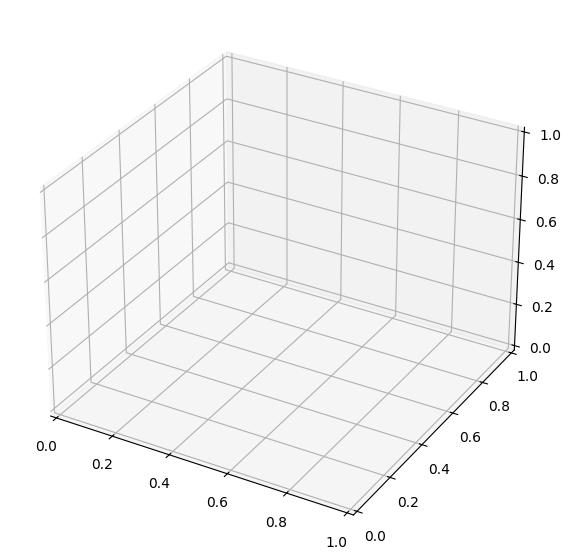

In [22]:


# Assuming your data is in torch.Tensor with shape [160, ...]
data = analyzer.eps[990]  # Replace this with your actual dataset
# Labels for your data points
labels = np.array([
    7, 6, 6, 1, 7, 1, 8, 8, 6, 8, 7, 1, 8, 8, 8, 6,
    8, 8, 6, 1, 1, 8, 6, 1, 7, 7, 6, 8, 6, 8, 8, 1,
    6, 6, 7, 6, 7, 6, 6, 1, 8, 7, 6, 7, 6, 1, 8, 6,
    6, 1, 7, 6, 8, 8, 6, 8, 8, 1, 8, 7, 6, 8, 8, 7,
    8, 6, 1, 7, 7, 1, 6, 6, 8, 7, 6, 8, 1, 7, 8, 6,
    6, 6, 7, 6, 8, 1, 1, 8, 6, 6, 1, 6, 6, 8, 8, 8,
    8, 6, 7, 8, 8, 6, 6, 6, 8, 7, 7, 1, 8, 1, 8, 8,
    8, 8, 7, 1, 8, 7, 8, 1, 6, 6, 7, 1, 8, 6, 6, 8,
    1, 1, 6, 8, 6, 6, 8, 1, 6, 1, 6, 6, 7, 7, 8, 6,
    8, 1, 8, 6, 6, 1, 1, 8, 8, 6, 7, 8, 8, 7, 6, 6
])


for i in range(0, 1000, 100):
    draw3d(analyzer.eps[i], labels, "eps"+str(1000-i))
draw3d(analyzer.eps[-1], labels, "eps"+str(0))
for i in range(0, 1000, 100):
    draw3d(analyzer.hsapce[i], labels, "hsapce"+str(1000-i))
draw3d(analyzer.hsapce[-1], labels, "eps"+str(0))
for i in range(0, 1000, 100):
    draw3d(analyzer.img[i], labels, "img"+str(1000-i))
draw3d(analyzer.img[-1], labels, "eps"+str(0))


In [ ]:
x_t = analyzer.eps[0]
for time_step in range(1,1000):
                # no noise when t == 0
    if time_step > 0:
        noise = torch.randn_like(x_t)
    else:
        noise = 0
    # 真正把噪音加入
    x_t + analyzer.mean[i] + torch.sqrt(analyzer.var[i]) * noise

show_tensor_images_grid(x_t, True)

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# 用來存放不同階動差的列表
meanList = []  # 一階動差 (均值)
varList = []   # 二階動差 (方差)
thirdMomentList = []  # 三階動差
fourthMomentList = [] # 四階動差
fifthMomentList = []  # 五階動差
sixthMomentList = []  # 六階動差

for i in range(0, 1000):
    data = analyzer.img[i]  # Example data (single image of shape [3, 32, 32])

    # 計算每個圖像的動差
    mean = data.mean()  # 一階動差 (均值)
    var = data.var()    # 二階動差 (方差)
    third_moment = torch.mean((data - mean) ** 3)  # 三階動差
    fourth_moment = torch.mean((data - mean) ** 4)  # 四階動差
    fifth_moment = torch.mean((data - mean) ** 5)  # 五階動差
    sixth_moment = torch.mean((data - mean) ** 6)  # 六階動差

    # 將動差添加到對應的列表中
    meanList.append(mean.item())
    varList.append(var.item())
    thirdMomentList.append(third_moment.item())
    fourthMomentList.append(fourth_moment.item())
    fifthMomentList.append(fifth_moment.item())
    sixthMomentList.append(sixth_moment.item())

# 畫出動差圖
plt.figure(figsize=(10, 5))

# 畫一階動差
plt.plot(meanList, label='1st Moment (Mean)', color='b')

# 畫二階動差
plt.plot(varList, label='2nd Moment (Variance)', color='r')

# 畫三階動差
plt.plot(thirdMomentList, label='3rd Moment', color='g')

# 畫四階動差
plt.plot(fourthMomentList, label='4th Moment', color='orange')

# 畫五階動差
plt.plot(fifthMomentList, label='5th Moment', color='purple')

# 畫六階動差
plt.plot(sixthMomentList, label='6th Moment', color='brown')

# 添加標題和標籤
plt.title('Higher Moments of Each Image Over 1000 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Moment Value')
plt.legend()

# 顯示圖表
plt.tight_layout()
plt.show()


In [ ]:
# 1, 6, 7, 8
labelsIndex = {1:[],6:[],7:[],8:[]}
for i in range(len(labels)):
    labelsIndex[labels[i]].append(i)
print(labelsIndex)

In [ ]:
# 1, 6, 7, 8, 1-6, 1-7, 1-8, 6-7, 6-8, 7-8
# for i in range(0,1001,100):
#     print(analyzer.eps[i])


In [ ]:
# Function to calculate distances between points
def calculate_distances(data, group1, group2):
    distances = []
    for i in group1:
        for j in group2:
            if i != j:  # Exclude self-pairs
                dist = np.linalg.norm(data[i] - data[j])
                distances.append(dist)
    return distances

# Calculate distances for different label group combinations
group_combinations = [
    (1, 1),  (6, 6), (7, 7), (8, 8),(1, 6), (1, 7), (1, 8), (6, 7), (6, 8), (7, 8)
]
# Assign colors to each group combination
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'yellow', 'black', 'fuchsia', 'lawngreen']
# Collect data for every 10th time step
time_steps = range(9, 1000, 100)
results_by_combination = {f"{g1}-{g2}": [] for g1, g2 in group_combinations}

for t in time_steps:
    data_at_t = analyzer.eps[t].cpu()
    for (g1, g2), color in zip(group_combinations, colors):
        group1_indices = labelsIndex[g1]
        group2_indices = labelsIndex[g2]
        distances = calculate_distances(data_at_t, group1_indices, group2_indices)
        results_by_combination[f"{g1}-{g2}"].append(distances)

# Plot the box plots for each group combination
plt.figure(figsize=(15, 8))
for i, (combination, color) in enumerate(zip(results_by_combination.keys(), colors)):
    data = results_by_combination[combination]
    box_positions = [j + i * 0.1 for j in range(len(data))]  # Slightly offset positions for box plots
    mean_positions = [np.mean(d) for d in data if d]
    
    plt.boxplot(data, positions=box_positions, widths=0.1, patch_artist=True,
            boxprops=dict(facecolor=color, color=color),
            whiskerprops=dict(color=color), capprops=dict(color=color),
            medianprops=dict(color='black'),
            labels=[combination] if len(box_positions) == 1 else None)

    # Plot the mean as scatter points
    plt.scatter(box_positions, mean_positions, color='black', label=f"Mean {combination}")

# Add labels and legend
plt.xticks(ticks=range(len(time_steps)), labels=time_steps, rotation=45)
plt.xlabel("Time Steps")
plt.ylabel("Distances")
plt.title("Box Plot of Pairwise Distances for Group Combinations of eps")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
# Function to calculate distances between points
def calculate_distances(data, group1, group2):
    distances = []
    for i in group1:
        for j in group2:
            if i != j:  # Exclude self-pairs
                dist = np.linalg.norm(data[i] - data[j])
                distances.append(dist)
    return distances

# Calculate distances for different label group combinations
group_combinations = [
    (1, 1),  (6, 6), (7, 7), (8, 8),(1, 6), (1, 7), (1, 8), (6, 7), (6, 8), (7, 8)
]
# Assign colors to each group combination
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'yellow', 'black', 'fuchsia', 'lawngreen']
# Collect data for every 10th time step
time_steps = range(9, 1000, 10)
results_by_combination = {f"{g1}-{g2}": [] for g1, g2 in group_combinations}

for t in time_steps:
    data_at_t = analyzer.hsapce[t].cpu()
    for (g1, g2), color in zip(group_combinations, colors):
        group1_indices = labelsIndex[g1]
        group2_indices = labelsIndex[g2]
        distances = calculate_distances(data_at_t, group1_indices, group2_indices)
        results_by_combination[f"{g1}-{g2}"].append(distances)

# Plot the line chart for each group combination
plt.figure(figsize=(15, 8))

for (combination, color) in zip(results_by_combination.keys(), colors):
    data = results_by_combination[combination]
    # Calculate the mean distance for each time step
    mean_distances = [np.mean(d) if d else 0 for d in data]
    
    # Plot the line for this group combination
    plt.plot(time_steps, mean_distances, color=color, label=combination, marker='o')

# Add labels, legend, and title
plt.xticks(ticks=time_steps, labels=time_steps, rotation=45)
plt.xlabel("Time Steps")
plt.ylabel("Mean Distances")
plt.title("Line Plot of Pairwise Distances for Group Combinations of hspace")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
# Function to calculate distances between points
def calculate_distances(data, group1, group2):
    distances = []
    for i in group1:
        for j in group2:
  # Exclude self-pairs
            dist = np.linalg.norm(data[i] - data[j])
            distances.append(dist)
    return distances

# Calculate distances for different label group combinations
group_combinations = [
    (1, 1),  (6, 6), (7, 7), (8, 8),(1, 6), (1, 7), (1, 8), (6, 7), (6, 8), (7, 8)
]
# Assign colors to each group combination
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'yellow', 'black', 'fuchsia', 'lawngreen']
# Collect data for every 10th time step
time_steps = range(9, 1000, 100)
results_by_combination = {f"{g1}-{g2}": [] for g1, g2 in group_combinations}

for t in time_steps:
    data_at_t = analyzer.hsapce[t].cpu()
    for (g1, g2), color in zip(group_combinations, colors):
        group1_indices = labelsIndex[g1]
        group2_indices = labelsIndex[g2]
        distances = calculate_distances(data_at_t, group1_indices, group2_indices)
        results_by_combination[f"{g1}-{g2}"].append(distances)

# Plot the box plots for each group combination
plt.figure(figsize=(15, 8))
for i, (combination, color) in enumerate(zip(results_by_combination.keys(), colors)):
    data = results_by_combination[combination]
    box_positions = [j + i * 0.1 for j in range(len(data))]  # Slightly offset positions for box plots
    mean_positions = [np.mean(d) for d in data if d]
    
    plt.boxplot(data, positions=box_positions, widths=0.1, patch_artist=True,
            boxprops=dict(facecolor=color, color=color),
            whiskerprops=dict(color=color), capprops=dict(color=color),
            medianprops=dict(color='black'),
            labels=[combination] if len(box_positions) == 1 else None)

    # Plot the mean as scatter points
    plt.scatter(box_positions, mean_positions, color='black', label=f"Mean {combination}" if i == 0 else None)

# Add labels and legend
plt.xticks(ticks=range(len(time_steps)), labels=time_steps, rotation=45)
plt.xlabel("Time Steps")
plt.ylabel("Distances")
plt.title("Box Plot of Pairwise Distances for Group Combinations")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Calculate distances for different label group combinations
group_combinations = [
    (1, 1),  (6, 6), (7, 7), (8, 8),(1, 6), (1, 7), (1, 8), (6, 7), (6, 8), (7, 8)
]
# Assign colors to each group combination
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'yellow', 'black']
# Collect data for every 10th time step
time_steps = range(9, 1000, 10)
results_by_combination = {f"{g1}-{g2}": [] for g1, g2 in group_combinations}

for t in time_steps:
    data_at_t = analyzer.hsapce[t].cpu()
    for (g1, g2), color in zip(group_combinations, colors):
        group1_indices = labelsIndex[g1]
        group2_indices = labelsIndex[g2]
        distances = calculate_distances(data_at_t, group1_indices, group2_indices)
        results_by_combination[f"{g1}-{g2}"].append(distances)

# Plot the line chart for each group combination
plt.figure(figsize=(15, 8))

for (combination, color) in zip(results_by_combination.keys(), colors):
    data = results_by_combination[combination]
    # Calculate the mean distance for each time step
    mean_distances = [np.mean(d) if d else 0 for d in data]
    
    # Plot the line for this group combination
    plt.plot(time_steps, mean_distances, color=color, label=combination, marker='o')

# Add labels, legend, and title
plt.xticks(ticks=time_steps, labels=time_steps, rotation=45)
plt.xlabel("Time Steps")
plt.ylabel("Mean Distances")
plt.title("Line Plot of Pairwise Distances for Group Combinations")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假設 analyzer 和 labelsIndex 已經定義，使用與上面的結構一致
# analyzer.hsapce[t].cpu() 是模擬的數據張量
# labelsIndex 是標籤的索引對應

# Function to calculate moments (from 1st to 10th moment)
def calculate_moments(data, order):
    return [np.mean(np.power(d, order)) if len(d) > 0 else 0 for d in data]

# Function to calculate distances between points

def calculate_distances(data, group1, group2):
    distances = []
    data_len = len(data)  # 確認 data 的長度
    for i in group1:
        for j in group2:
            if i != j:  # Exclude self-pairs
                # 確保索引在有效範圍內
                if i < data_len and j < data_len:
                    # 使用 .detach() 和 .numpy() 來處理 Tensor
                    dist = np.linalg.norm(data[i].detach().numpy() - data[j].detach().numpy())
                    distances.append(dist)
    return distances


# 設定組別組合
group_combinations = [
    (1, 1), (6, 6), (7, 7), (8, 8), (1, 6), (1, 7), (1, 8), (6, 7), (6, 8), (7, 8)
]
# 設定顏色
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'yellow', 'black', 'pink', 'cyan']

# 收集所有時間步驟的數據
time_steps = range(0, 1000, 10)  # 每 10 個時間步驟
results_by_combination = {f"{g1}-{g2}": [] for g1, g2 in group_combinations}

for t in time_steps:
    data_at_t = analyzer.hsapce[t].cpu()  # 假設這裡是數據獲取的方式
    for (g1, g2) in group_combinations:
        group1_indices = labelsIndex[g1]
        group2_indices = labelsIndex[g2]
        distances = calculate_distances(data_at_t, group1_indices, group2_indices)
        results_by_combination[f"{g1}-{g2}"].append(distances)

# 開始繪圖
plt.figure(figsize=(15, 8))

# 繪製每個組合的折線圖（1到10階動差）
for combination, color in zip(results_by_combination.keys(), colors):
    data = results_by_combination[combination]
    # 計算每個階段的動差 (1~10階)
    for order in range(1, 11):  # 1st to 10th moment
        moment_values = calculate_moments([np.array(d) for d in data], order)
        # 繪製折線圖
        plt.plot(time_steps, moment_values, label=f"{combination} {order}階動差", color=color, marker='o')

# 添加圖例、標籤和標題
plt.xticks(ticks=time_steps, labels=time_steps, rotation=45)
plt.xlabel("Time Steps")
plt.ylabel("Moment Values")
plt.title("1st to 10th Moments of Pairwise Distances for Different Group Combinations")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# 用來存放不同階動差的列表
meanList = []  # 一階動差 (均值)
varList = []   # 二階動差 (方差)
thirdMomentList = []  # 三階動差
fourthMomentList = [] # 四階動差
fifthMomentList = []  # 五階動差
sixthMomentList = []  # 六階動差

for i in range(0, 1000):
    data = analyzer.img[i]  # Example data (single image of shape [3, 32, 32])

    # 計算每個圖像的動差
    mean = data.mean()  # 一階動差 (均值)
    var = data.var()    # 二階動差 (方差)
    third_moment = torch.mean((data - mean) ** 3)  # 三階動差
    fourth_moment = torch.mean((data - mean) ** 4)  # 四階動差
    fifth_moment = torch.mean((data - mean) ** 5)  # 五階動差
    sixth_moment = torch.mean((data - mean) ** 6)  # 六階動差

    # 將動差添加到對應的列表中
    meanList.append(mean.item())
    varList.append(var.item())
    thirdMomentList.append(third_moment.item())
    fourthMomentList.append(fourth_moment.item())
    fifthMomentList.append(fifth_moment.item())
    sixthMomentList.append(sixth_moment.item())

# 畫出動差圖
plt.figure(figsize=(10, 5))

# 畫一階動差
plt.plot(meanList, label='1st Moment (Mean)', color='b')

# 畫二階動差
plt.plot(varList, label='2nd Moment (Variance)', color='r')

# 畫三階動差
plt.plot(thirdMomentList, label='3rd Moment', color='g')

# 畫四階動差
plt.plot(fourthMomentList, label='4th Moment', color='orange')

# 畫五階動差
plt.plot(fifthMomentList, label='5th Moment', color='purple')

# 畫六階動差
plt.plot(sixthMomentList, label='6th Moment', color='brown')

# 添加標題和標籤
plt.title('Higher Moments of Each Image Over 1000 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Moment Value')
plt.legend()

# 顯示圖表
plt.tight_layout()
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

# 用來存放不同階動差的列表
meanList = []  # 一階動差 (均值)
varList = []   # 二階動差 (方差)
thirdMomentList = []  # 三階動差
fourthMomentList = [] # 四階動差
fifthMomentList = []  # 五階動差
sixthMomentList = []  # 六階動差

# 用來存放每個動差的斜率
mean_slope = []
var_slope = []
thirdMoment_slope = []
fourthMoment_slope = []
fifthMoment_slope = []
sixthMoment_slope = []

for i in range(0, 1000):
    data = analyzer.img[i]  # Example data (single image of shape [3, 32, 32])

    # 計算每個圖像的動差
    mean = data.mean()  # 一階動差 (均值)
    var = data.var()    # 二階動差 (方差)
    third_moment = torch.mean((data - mean) ** 3)  # 三階動差
    fourth_moment = torch.mean((data - mean) ** 4)  # 四階動差
    fifth_moment = torch.mean((data - mean) ** 5)  # 五階動差
    sixth_moment = torch.mean((data - mean) ** 6)  # 六階動差

    # 將動差添加到對應的列表中
    meanList.append(mean.item())
    varList.append(var.item())
    thirdMomentList.append(third_moment.item())
    fourthMomentList.append(fourth_moment.item())
    fifthMomentList.append(fifth_moment.item())
    sixthMomentList.append(sixth_moment.item())

# 計算每個動差的斜率 (數值微分)
def calculate_slope(values):
    slopes = []
    for i in range(1, len(values)):
        slope = values[i] - values[i - 1]  # 計算相鄰兩個點的差值，近似為斜率
        slopes.append(slope)
    slopes.append(0)  # 最後一個斜率設定為0（可選）
    return slopes

mean_slope = calculate_slope(meanList)
var_slope = calculate_slope(varList)
thirdMoment_slope = calculate_slope(thirdMomentList)
fourthMoment_slope = calculate_slope(fourthMomentList)
fifthMoment_slope = calculate_slope(fifthMomentList)
sixthMoment_slope = calculate_slope(sixthMomentList)

# 畫出動差圖
plt.figure(figsize=(10, 5))

# 畫一階動差
plt.plot(meanList, label='1st Moment (Mean)', color='b')

# 畫二階動差
plt.plot(varList, label='2nd Moment (Variance)', color='r')

# 畫三階動差
plt.plot(thirdMomentList, label='3rd Moment', color='g')

# 畫四階動差
plt.plot(fourthMomentList, label='4th Moment', color='orange')

# 畫五階動差
plt.plot(fifthMomentList, label='5th Moment', color='purple')

# 畫六階動差
plt.plot(sixthMomentList, label='6th Moment', color='brown')

# 添加標題和標籤
plt.title('Higher Moments of Each Image Over 1000 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Moment Value')
plt.legend()

# 顯示動差圖
plt.tight_layout()
plt.show()

# 畫出斜率圖
plt.figure(figsize=(10, 5))

# 畫一階動差的斜率
plt.plot(mean_slope, label='1st Moment (Mean) Slope', color='b')

# 畫二階動差的斜率
plt.plot(var_slope, label='2nd Moment (Variance) Slope', color='r')

# 畫三階動差的斜率
plt.plot(thirdMoment_slope, label='3rd Moment Slope', color='g')

# 畫四階動差的斜率
plt.plot(fourthMoment_slope, label='4th Moment Slope', color='orange')

# 畫五階動差的斜率
plt.plot(fifthMoment_slope, label='5th Moment Slope', color='purple')

# 畫六階動差的斜率
plt.plot(sixthMoment_slope, label='6th Moment Slope', color='brown')

# 添加標題和標籤
plt.title('Slopes of Higher Moments Over 1000 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Slope Value')
plt.legend()

# 顯示斜率圖
plt.tight_layout()
plt.show()


## 輸出的權重會在 /kaggle/working/CheckpointsMNIST 裡面

In [ ]:
os.getcwd()

In [ ]:
os.listdir(os.getcwd())

In [ ]:
model_config

In [ ]:
!rm -r SampledImgsMNIST;

In [ ]:
!cd ..;pwd;ls;cd ..;ls;cd home;ls


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 讀取圖片
image_path = './SampledImgsMNIST/SampledNoGuidenceImgs199.png'  # 請替換成你圖片的路徑
img = Image.open(image_path)

# 顯示圖片
plt.imshow(img)
plt.axis('off')  # 隱藏座標軸
plt.show()
